In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from mlModelSaver import MlModelSaver : SyntaxError: f-string: unmatched '('

In [3]:
# Let's have a look at our dataset
df_penguins = pd.read_csv("https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv")
df_penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# How many penguins do we have ? 344, that's a lot of them
df_penguins.shape

(344, 9)

![344 penguins](https://i.imgur.com/ueJdRBO.png)

In [6]:
# We have various float values, we'll try to guess the body mass from the other ones
df_penguins.dtypes

rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [7]:
# let's remove non numeric columns and rows with missing data
import numpy as np
df_penguins=df_penguins.select_dtypes(include=np.number).dropna()
df_penguins.shape

(342, 6)

In [8]:
# Let's see which columns are corelated with the mass
df_penguins.corr()['body_mass_g']

rowid                0.275493
bill_length_mm       0.595110
bill_depth_mm       -0.471916
flipper_length_mm    0.871202
body_mass_g          1.000000
year                 0.042209
Name: body_mass_g, dtype: float64

In [9]:
# It semms flipper_length_mm and bill_length_mm are hte only usefull columns. Row ids are grouped by penguin
# type, so it's a bit correlated but we'll ignore it. 
df_penguins=df_penguins[['bill_length_mm','flipper_length_mm','body_mass_g']]

In [10]:
# Our values seem reasonable
df_penguins.describe()


,bill_length_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000
mean,43.921930,200.915205,4201.754386
std,5.459584,14.061714,801.954536
min,32.100000,172.000000,2700.000000
25%,39.225000,190.000000,3550.000000
50%,44.450000,197.000000,4050.000000
75%,48.500000,213.000000,4750.000000
max,59.600000,231.000000,6300.000000


<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

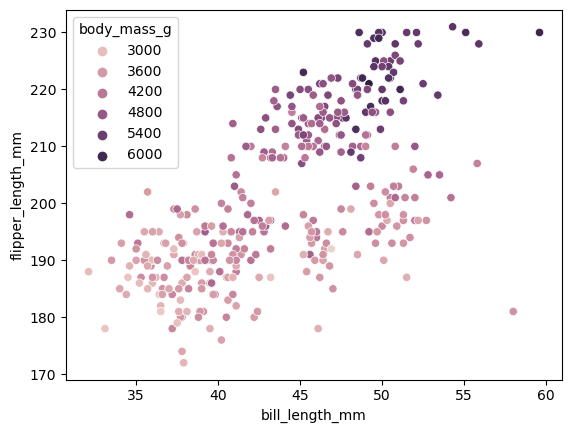

In [11]:
# data visualisation
sns.scatterplot(data=df_penguins, x='bill_length_mm', y='flipper_length_mm', hue='body_mass_g')

In [34]:
# out hypothesis is that the two first columns can let us predict the weight of the penguin

In [19]:
# build first model : ols
# split the data 
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    df_penguins)

In [32]:
# ols model and coefs
from statsmodels.formula.api import ols
ols = ols('body_mass_g ~ bill_length_mm*flipper_length_mm+0 ', data=train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            body_mass_g   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              9729.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                   6.01e-261
Time:                        21:54:41   Log-Likelihood:                         -1894.3
No. Observations:                 256   AIC:                                      3795.
Df Residuals:                     253   BIC:                                      3805.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
bill_length_mm                    -124.1573     10.379    -11.963      0.000    -144.597    -103.718
flipper_length_mm                   19.0155      1.313     14.482      0.000      16.430      21.601
bill_length_mm:flipper_length_mm     0.6583      0.040     16.646      0.000       0.580       0.736
==============================================================================
Omnibus:                        4.090   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.921
Skew:                           0.302   Prob(JB):                        0.141
Kurtosis:                       3.047   Cond. No.                     3.76e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# test R squared 
y_pred = ols.predict(test[['bill_length_mm','flipper_length_mm']])
y_test = test['body_mass_g']
corr = np.corrcoef(y_test, y_pred)
corr[0,1]


0.8839557076150645

In [12]:
# build our second model : sikit learn linear regression
# let's split automatically our dataset into a training and testing dataset
from sklearn.model_selection import train_test_split
training_input, testing_input,training_output,testing_output = train_test_split(
    df_penguins[['bill_length_mm','flipper_length_mm']],
    df_penguins['body_mass_g'])

In [13]:
# First we train a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(training_input, training_output)


In [28]:
# Lets compute our r squared, we give score our original test input  and expected output
model.score(testing_input, testing_output)

0.7416930943514287

In [15]:
from sklearn.metrics import mean_squared_error
# not too bad, let's see our mean_squared_error
mean_squared_error(testing_output, model.predict(testing_input))

180596.04929714862

In [17]:
# Check RMSE
import math
math.sqrt(124698)
# so, our average estimate is off by 353g 

353.1260398214779

In [60]:
df_penguins['body_mass_g'].mean()
# for a 4kg average bird, that's still allright

4201.754385964912

In [61]:
# let's save our model
from mlModelSaver import MlModelSaver

SyntaxError: f-string: unmatched '(' (__init__.py, line 107)

In [64]:
# the export lib seems to crash, but our model is so simple, it can be summed up as 3 numbers
model.coef_

array([ 1.80749048, 49.49315676])

In [66]:
model.intercept_

-5816.736051126896

In [69]:
def predict_body_mass_g(bill_length_mm,flipper_length_mm):
    return 1.80749048 * bill_length_mm + 49.49315676*flipper_length_mm -5816.736051126896
    

In [79]:
df_penguins

,bill_length_mm,flipper_length_mm,body_mass_g
0,39.1,181.0,3750.0
1,39.5,186.0,3800.0
2,40.3,195.0,3250.0
4,36.7,193.0,3450.0
5,39.3,190.0,3650.0
...,...,...,...
339,55.8,207.0,4000.0
340,43.5,202.0,3400.0
341,49.6,193.0,3775.0
342,50.8,210.0,4100.0


In [81]:
# here's how to predict one output given a specific input
predict_body_mass_g(39.3,190.0)

3657.998109137103

In [78]:
# here's how to use the "exported" model to add a predicted mass column
df_penguins.assign(Approximation = lambda x: predict_body_mass_g(x['bill_length_mm'],x['flipper_length_mm']))

,bill_length_mm,flipper_length_mm,body_mass_g,Approximation
0,39.1,181.0,3750.0,3212.198200
1,39.5,186.0,3800.0,3460.386980
2,40.3,195.0,3250.0,3907.271383
4,36.7,193.0,3450.0,3801.778104
5,39.3,190.0,3650.0,3657.998109
...,...,...,...,...
339,55.8,207.0,4000.0,4529.205367
340,43.5,202.0,3400.0,4259.507450
341,49.6,193.0,3775.0,3825.094731
342,50.8,210.0,4100.0,4668.647385


# Exposing the "model" as a fastapi endpoint 

Type this in main.py

    from fastapi import FastAPI
    app = FastAPI()
    @app.get("/predict_body_mass_g/{bill_length_mm}/{flipper_length_mm}")
    def predict_body_mass_g(bill_length_mm:float, flipper_length_mm:float):
        return 1.80749048 * bill_length_mm + 49.49315676*flipper_length_mm -5816.736051126896

then run 
    
    fastapi dev main.py 

Then open this url : http://127.0.0.1:8000/predict_body_mass_g/39.3/190

